In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("WAM3 Annual Emmissions Development.csv", index_col=0)

df = df.rename(columns={"Unnamed: 0": "rok", "0": "emissions_per_kwh"})

df = df.transpose()
df

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
emissions_per_kwh,0.501099,0.499158,0.501063,0.504227,0.50432,0.497428,0.484564,0.473826,0.471351,0.462743,0.445586,0.420354,0.38773,0.348563,0.303808,0.254482,0.201608


In [12]:
gas = 1485
electricity = 13441
heat_pump = 4167
coal_em_per_kg = 3.64
gas_em_per_kg = 1.85

In [13]:
emissions_per_source = [
    gas,
    electricity,
    heat_pump,
    coal_em_per_kg,
    gas_em_per_kg,
]
emissions_per_source

[1485, 13441, 4167, 3.64, 1.85]

In [14]:
flat_80_sqm = pd.DataFrame(columns=df.columns)

flat_80_sqm.loc["PL"] = gas * gas_em_per_kg
flat_80_sqm.loc["TC"] = df.loc["emissions_per_kwh"] * heat_pump
flat_80_sqm.loc["EL"] = df.loc["emissions_per_kwh"] * electricity

flat_80_sqm

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
PL,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000
TC,2088.078835,2079.991626,2087.927513,2101.114219,2101.500399,2072.781728,2019.177265,1974.434938,1964.120827,1928.249354,1856.754797,1751.613588,1615.672580,1452.460110,1265.967899,1060.427285,840.100492
EL,6735.269407,6709.183451,6734.781305,6777.316108,6778.561762,6685.927335,6513.021746,6368.701706,6335.432693,6219.726319,5989.114767,5649.973178,5211.484318,4685.029121,4083.483209,3420.495112,2709.812986


Text(0, 0.5, 'Roční emise CO2 (kg)')

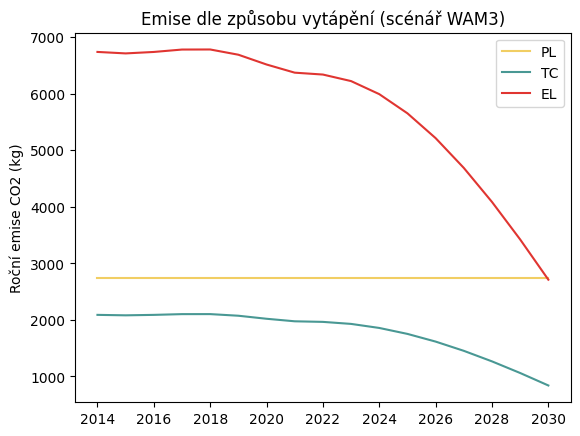

In [15]:
df_transposed = flat_80_sqm.transpose()

colors_dict = {
    "UH": "#9D7660",
    "PL": "#F1CE63",
    "EL": "#e03531",
    "TC": "#499894",
}

colors = [colors_dict[column] for column in df_transposed.columns]

df_transposed.plot(color=colors)
plt.title("Emise dle způsobu vytápění (scénář WAM3)")
plt.ylabel("Roční emise CO2 (kg)")